In [4]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.utils import to_categorical

In [5]:
# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 定义类别
labels = ['零','一','二','三','四','五','六','七','八','九','十','百','千','万','亿']
#labels = ['ling', 'yi', 'er', 'san', 'si', 'wu', 'liu', 'qi', 'ba', 'jiu', 'shi', 'bai', 'qian', 'wan', 'yiyi']
label_dict = {idx: label for idx, label in enumerate(labels)}
print(label_dict)

# 数据集路径
data_path = 'data/RawDataset'

# 数据加载和预处理函数
def load_data(data_path):
    images = []
    targets = []
    
    # 遍历数据集文件夹中的所有图片
    for filename in os.listdir(data_path):
        if filename.endswith('.jpg'):
            img_path = os.path.join(data_path, filename)
            
            # 提取标签信息（文件名的最后一个数字作为标签）
            base_name = filename.rsplit('.', 1)[0]
            base_name = base_name.strip('{}')  # 去掉大括号
            label = base_name.split(',')[-1]  # 提取最后一个数字
            
            # 读取并预处理图像
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # 读取灰度图像
            img = cv2.resize(img, (64, 64))  # 调整为64x64
            img = img.astype('float32') / 255.0  # 归一化
            
            # 存储图像和标签
            images.append(img)
            targets.append(int(label)-1)  # 获取对应的标签
    
    return np.array(images), np.array(targets)

# 加载数据
images, targets = load_data(data_path)

{0: '零', 1: '一', 2: '二', 3: '三', 4: '四', 5: '五', 6: '六', 7: '七', 8: '八', 9: '九', 10: '十', 11: '百', 12: '千', 13: '万', 14: '亿'}


In [6]:
# Step 1: 数据预处理 - 添加一个通道维度
images = np.expand_dims(images, axis=-1)

# Step 2: 特征工程 - 提取 HOG 和 PCA 特征
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image.squeeze(), orientations=9, pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2), visualize=False)
        hog_features.append(features)
    return np.array(hog_features)

def extract_pca_features(images, n_components=50):
    reshaped_images = images.reshape(len(images), -1)  # 将每张图片展平
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(reshaped_images)
    return pca_features

# 提取 HOG 和 PCA 特征
X_hog = extract_hog_features(images)
X_pca = extract_pca_features(images)


Training KNN classifier...
Epoch 1/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 2/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 3/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 4/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 5/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 6/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 7/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 8/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 9/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71
Epoch 10/10 - KNN Train Accuracy: 0.81, Test Accuracy: 0.71


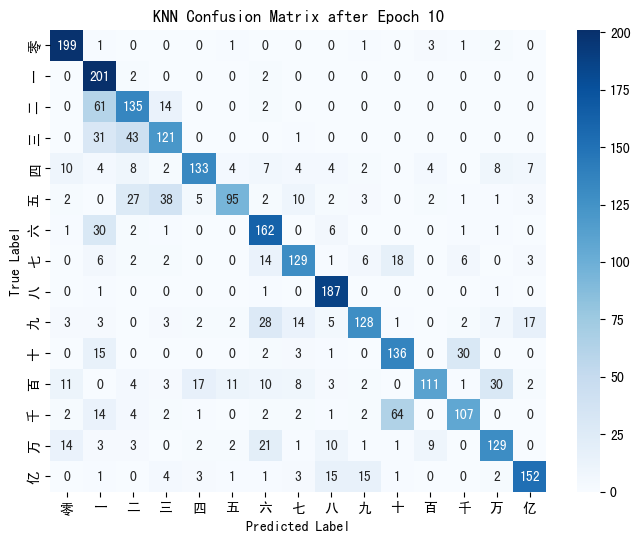

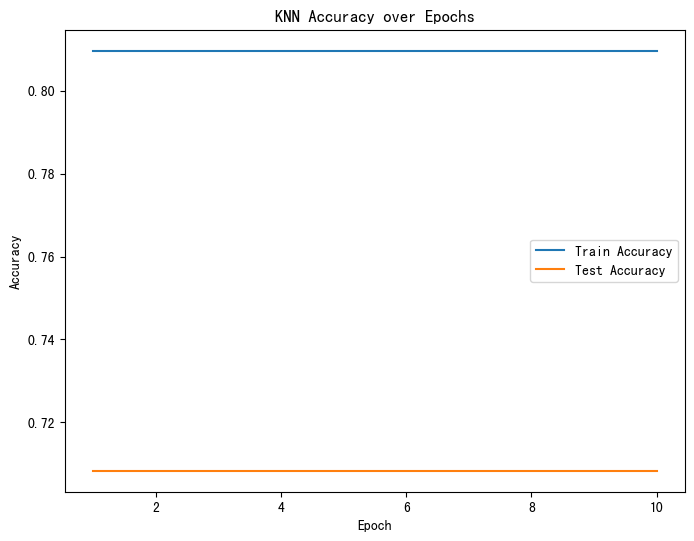


Training SVM classifier...
Epoch 1/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 2/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 3/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 4/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 5/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 6/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 7/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 8/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 9/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53
Epoch 10/10 - SVM Train Accuracy: 0.57, Test Accuracy: 0.53


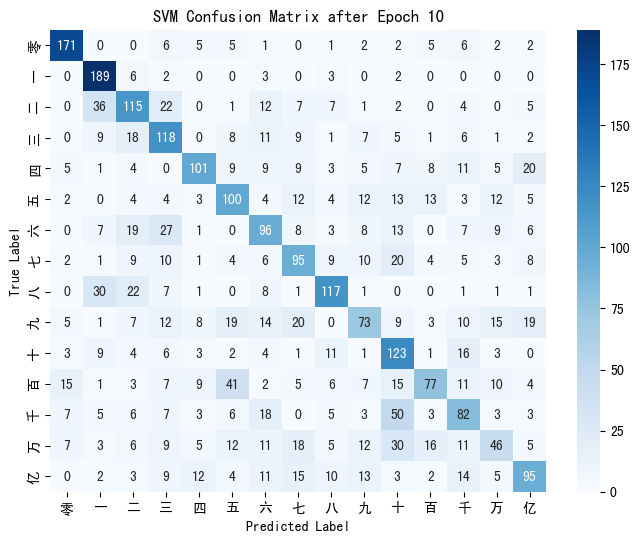

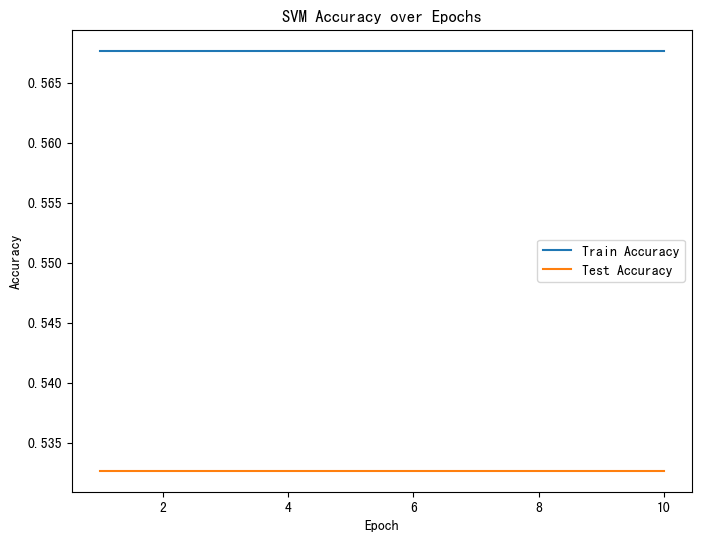


Training Logistic Regression classifier...
Epoch 1/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 2/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 3/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 4/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 5/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 6/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 7/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 8/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 9/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48
Epoch 10/10 - Logistic Regression Train Accuracy: 0.49, Test Accuracy: 0.48


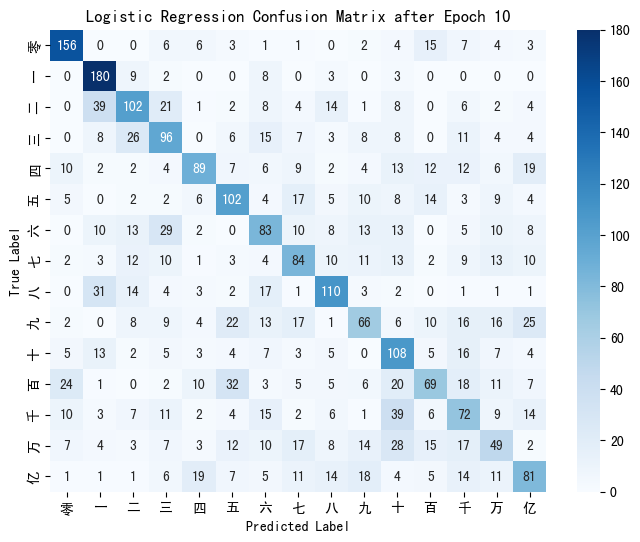

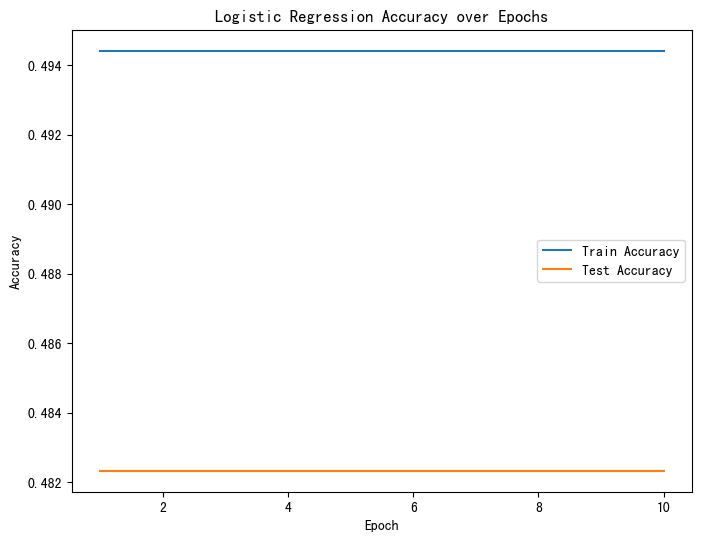

In [7]:
# 选择其中一个特征进行分类
X_features = X_pca  

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_features, targets, test_size=0.2, random_state=42)

# Step 3: 定义分类器并进行训练
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', probability=True),
    'Logistic Regression': LogisticRegression(max_iter=200)
}

# 训练过程及可视化
num_epochs = 10  # 模拟训练的 epoch 次数
for name, clf in classifiers.items():
    print(f"\nTraining {name} classifier...")
    train_accuracies = []
    test_accuracies = []
    
    for epoch in range(num_epochs):
        # 训练模型
        clf.fit(X_train, y_train)
        
        # 训练集和测试集的预测结果
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        # 计算准确率
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
        print(f"Epoch {epoch+1}/{num_epochs} - {name} Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
        
        # 每个 epoch 后绘制混淆矩阵
        if epoch == num_epochs - 1:
            cm = confusion_matrix(y_test, y_test_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
            plt.title(f'{name} Confusion Matrix after Epoch {epoch+1}')
            plt.ylabel('True Label')
            plt.xlabel('Predicted Label')
            plt.show()
    
    # 绘制准确率随 epoch 的变化曲线
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
    plt.title(f'{name} Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # # 计算和绘制 AUC 曲线
    # if name != 'SVM':
    #     # 使用概率的模型 (KNN, Logistic Regression)
    #     y_score = clf.predict_proba(X_test)
    # else:
    #     # 对于 SVM 使用 decision_function 来获取决策分数
    #     y_score = clf.decision_function(X_test)
    
    # # AUC 计算和可视化
    # fpr, tpr, roc_auc = {}, {}, {}
    # for i in range(len(labels)):
    #     fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i] if name != 'SVM' else y_score)
    #     roc_auc[i] = auc(fpr[i], tpr[i])
    
    # # 绘制每个类别的 ROC 曲线
    # plt.figure(figsize=(10, 8))
    # for i in range(len(labels)):
    #     plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')
    
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title(f'{name} ROC Curve')
    # plt.legend(loc="lower right")
    # plt.show()
